# All variables of a structure (not taking into account usage) that have been found to have an effect:
geo_level_1_id <br>
geo_level_2_id <br>
geo_level_3_id <br>
count_floors_pre_eq <br>
land_surface_condition <br>
foundation_type <br>
roof_type <br>
ground_floor_type <br>
other_floor_type <br>
has_superstructure_x <br>
area_percentage <br>
height_percentage <br>
age <br>
<br>
lesser variables: <br>
position <br>

# References:
pandas documentation:https://pandas.pydata.org/pandas-docs/stable/index.html <br>
stack overflow(for questions on how to use pandas functions,etc):https://stackoverflow.com/ <br>
https://stackoverflow.com/questions/50733014/linear-regression-with-dummy-categorical-variables <br>
https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell <br>
Notebooks provided by NTU for this course <br>

In [1]:
# import data science libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# import data
labels = pd.read_csv('../data/earthquake/train_labels.csv')
labels.head()
data = pd.read_csv('../data/earthquake/train_values.csv')
data.head()
# merge damage sustained into normal data
combined_data = pd.merge(data, labels, on='building_id')

In [3]:
# initial data analysis
data.info()
labels.info()
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:
data_frame = combined_data[['count_floors_pre_eq','damage_grade']]
data_frame.head()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   count_floors_pre_eq  260601 non-null  int64
 1   damage_grade         260601 non-null  int64
dtypes: int64(2)
memory usage: 6.0 MB


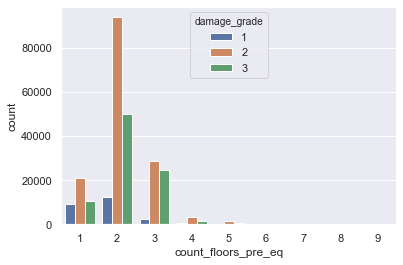

In [5]:
sb.countplot(x='count_floors_pre_eq',hue = 'damage_grade', data=data_frame)

In [6]:
# Find percentage of bulidings damaged/destroyed for each type of floor
for x in range(1,10):
    processed_data_frame = combined_data.copy(deep=True)
    processed_data_frame.head()
    floor_data_frame = processed_data_frame[processed_data_frame['count_floors_pre_eq']==x]
    floor_data_frame.head()
    collapsed = len(floor_data_frame[floor_data_frame['damage_grade'] == 3])
    damaged = len(floor_data_frame[floor_data_frame['damage_grade'] == 2])
    intact = len(floor_data_frame[floor_data_frame['damage_grade'] == 1])
    total = intact+damaged+collapsed
    result = (damaged+collapsed)/total
    print("floors: "+ str(x)+" Percentage: "+str(result)+ " Total: "+str(total)+ " Intact: "+str(intact))

floors: 1 Percentage: 0.7782201231423556 Total: 40441 Intact: 8969
floors: 2 Percentage: 0.9195967386654578 Total: 156623 Intact: 12593
floors: 3 Percentage: 0.9543844507974181 Total: 55617 Intact: 2537
floors: 4 Percentage: 0.8696533923303835 Total: 5424 Intact: 707
floors: 5 Percentage: 0.8869100623330365 Total: 2246 Intact: 254
floors: 6 Percentage: 0.7464114832535885 Total: 209 Intact: 53
floors: 7 Percentage: 0.7435897435897436 Total: 39 Intact: 10
floors: 8 Percentage: 1.0 Total: 1 Intact: 0
floors: 9 Percentage: 0.0 Total: 1 Intact: 1


In [7]:
# There is only one building with 8 floors which was damaged and one with 9 floors which was undamaged, might be outliers
# or might want to investigate what makes 8th floor damaged but 9th floor not

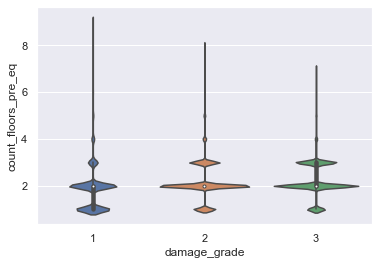

In [8]:
ax = sb.violinplot(x="damage_grade", y="count_floors_pre_eq", data=combined_data)

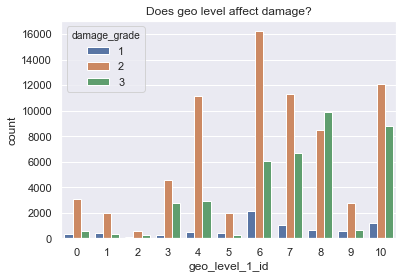

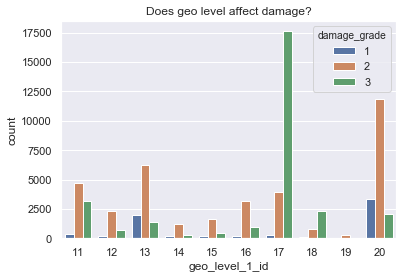

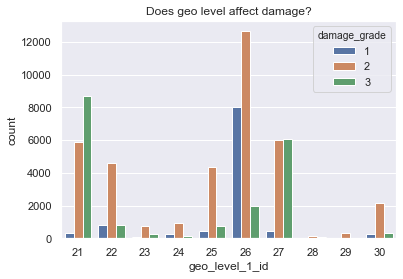

In [9]:
processed_data_frame = combined_data[combined_data['geo_level_1_id']<11]
processed_data_frame.head()
ax = sb.countplot(x="geo_level_1_id", hue="damage_grade", data=processed_data_frame)
ax.set_title("Does geo level affect damage?")
plt.show()
processed_data_frame = combined_data[(combined_data['geo_level_1_id']>10) & (combined_data['geo_level_1_id']<21)]
processed_data_frame.head()
ax = sb.countplot(x="geo_level_1_id", hue="damage_grade", data=processed_data_frame)
ax.set_title("Does geo level affect damage?")
plt.show()
processed_data_frame = combined_data[(combined_data['geo_level_1_id']>20) & (combined_data['geo_level_1_id']<31)]
processed_data_frame.head()
ax = sb.countplot(x="geo_level_1_id", hue="damage_grade", data=processed_data_frame)
ax.set_title("Does geo level affect damage?")
plt.show()

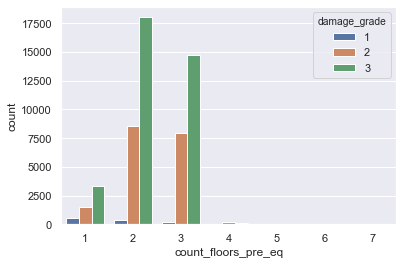

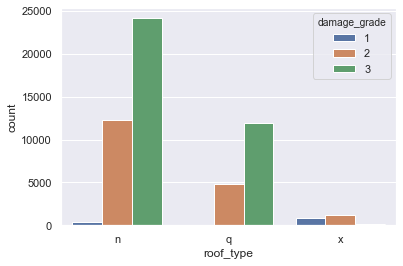

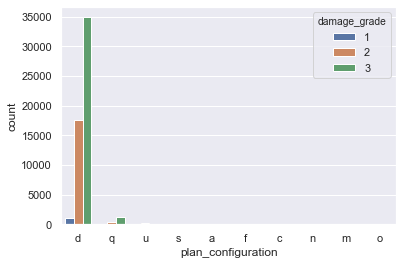

In [34]:
processed_data_frame = combined_data[(combined_data['geo_level_1_id']==17)|(combined_data['geo_level_1_id']==21)|(combined_data['geo_level_1_id']==8)]
processed_data_frame.head()
ax = sb.countplot(x='count_floors_pre_eq',hue = 'damage_grade', data=processed_data_frame)
plt.show()
ax = sb.countplot(x="roof_type", hue="damage_grade", data=processed_data_frame)
plt.show()
ax = sb.countplot(x="plan_configuration", hue="damage_grade", data=processed_data_frame)
plt.show()

Text(0.5, 1.0, 'Does roof type affect damage?')

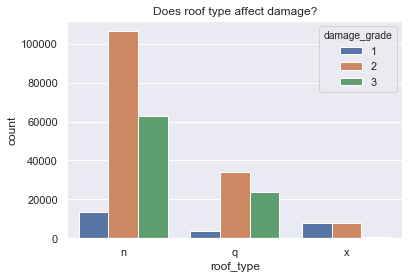

In [10]:
ax = sb.countplot(x="roof_type", hue="damage_grade", data=combined_data)
ax.set_title("Does roof type affect damage?")

Text(0.5, 1.0, 'Does foundation type affect damage?')

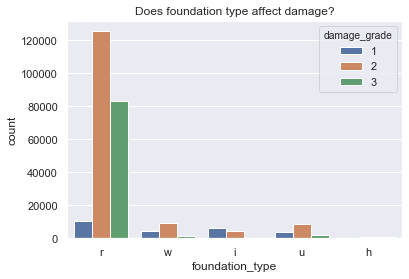

In [11]:
ax = sb.countplot(x="foundation_type", hue="damage_grade", data=combined_data)
ax.set_title("Does foundation type affect damage?")

Text(0.5, 1.0, 'Damage to mud buildings')

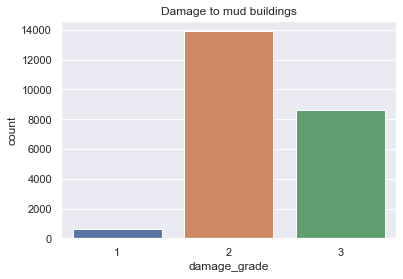

In [12]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_adobe_mud']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to mud buildings")

Text(0.5, 1.0, 'Damage to mortar-stone buildings')

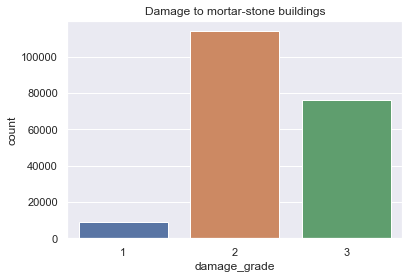

In [13]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_mud_mortar_stone']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to mortar-stone buildings")

Text(0.5, 1.0, 'Damage of stone buildings')

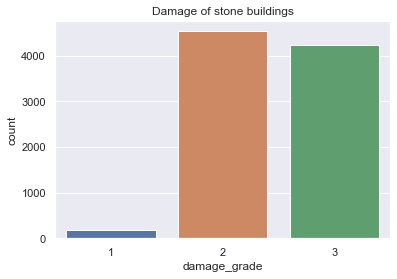

In [14]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_stone_flag']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage of stone buildings")

Text(0.5, 1.0, 'Damage to cement-mortar buildings')

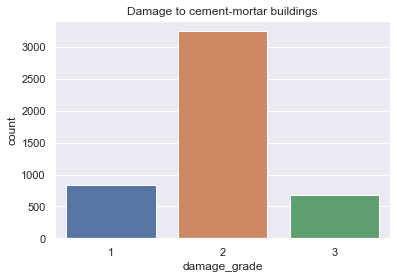

In [15]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_cement_mortar_stone']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to cement-mortar buildings")

Text(0.5, 1.0, 'Damage to mud-mortar-brick buildings')

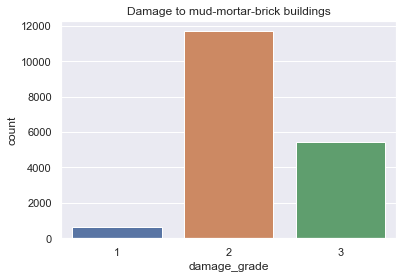

In [16]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_mud_mortar_brick']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to mud-mortar-brick buildings")

Text(0.5, 1.0, 'Damage to cement-mortar-brick buildings')

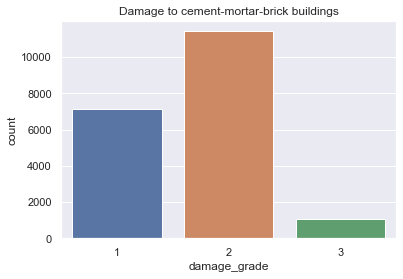

In [17]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_cement_mortar_brick']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to cement-mortar-brick buildings")

Text(0.5, 1.0, 'Damage to timber buildings')

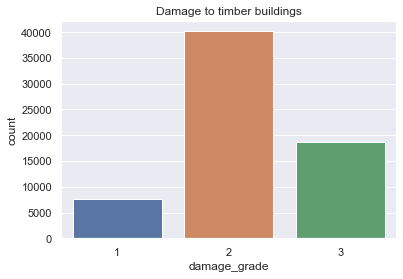

In [18]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_timber']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to timber buildings")

Text(0.5, 1.0, 'Damage to bambooo buildings')

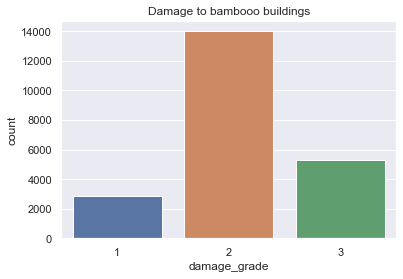

In [19]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_bamboo']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to bambooo buildings")

Text(0.5, 1.0, 'Damage to non-engineered reinforced concrete buildings')

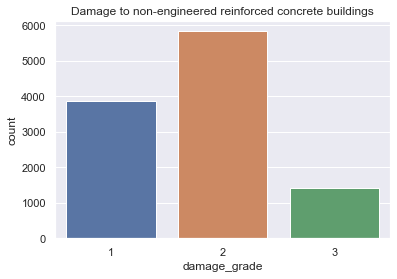

In [20]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_rc_non_engineered']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to non-engineered reinforced concrete buildings")

Text(0.5, 1.0, 'Damage to engineered reinforced concrete buildings')

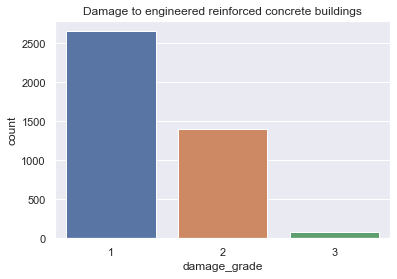

In [21]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_superstructure_rc_engineered']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to engineered reinforced concrete buildings")

buildings with secondary use are generally less damaged than those with one use, better engineered?


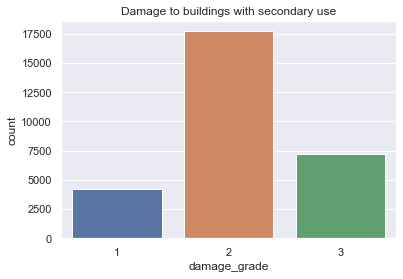

In [22]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_secondary_use']==1]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to buildings with secondary use")
print("buildings with secondary use are generally less damaged than those with one use, better engineered?")

Text(0.5, 1.0, 'Damage to buildings with no secondary use')

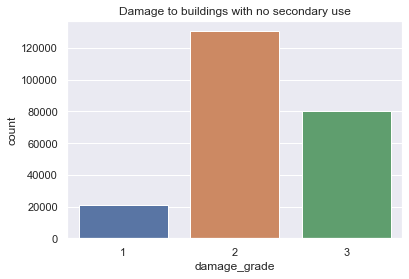

In [23]:
processed_data_frame = combined_data.copy(deep=True)
processed_data_frame.head()
superstructure_data_frame = processed_data_frame[processed_data_frame['has_secondary_use']==0]
ax = sb.countplot(x="damage_grade", data=superstructure_data_frame)
ax.set_title("Damage to buildings with no secondary use")

In [24]:
# Attempt classification from building construction type to damage 
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
predict_data = combined_data[['damage_grade','has_superstructure_rc_engineered','has_superstructure_rc_non_engineered','has_superstructure_bamboo','has_superstructure_timber','has_superstructure_cement_mortar_brick','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_stone','has_superstructure_stone_flag','has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud','has_superstructure_other','count_floors_pre_eq','roof_type','foundation_type','plan_configuration','land_surface_condition','ground_floor_type','other_floor_type']]
process_predict_data = pd.get_dummies(data=predict_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']


In [25]:
#predict labels
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=1200000).fit(x_train, y_train)
LR.predict(x_test)
score = LR.score(x_test, y_test)
print(score)

0.5866733178565262


In [26]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print(score)
score = dectree.score(x_train, y_train)
print(score)

0.5912971738838472
0.6142219877206446


# The accuracy of Classifying is very low when only provided with building information without geo id

In [27]:
predict_data = combined_data[['geo_level_3_id','age','damage_grade','height_percentage','area_percentage','has_superstructure_rc_engineered','has_superstructure_rc_non_engineered','has_superstructure_bamboo','has_superstructure_timber','has_superstructure_cement_mortar_brick','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_stone','has_superstructure_stone_flag','has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud','has_superstructure_other','count_floors_pre_eq','roof_type','foundation_type','land_surface_condition','geo_level_1_id','geo_level_2_id','ground_floor_type','other_floor_type']]
process_predict_data = pd.get_dummies(data=predict_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']

In [28]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print(score)
score = dectree.score(x_train, y_train)
print(score)

0.6938470098424819
0.8443735610130468


# Classification accuracy increases when adding geolocation, so geo level is very important to whether a buildings collapses, however geo_level_1 has the most effect on accuracy, adding geo_level 2 adds less accuracy and geo_level 3 less so.

# test classification with all variables:

In [29]:
process_predict_data = pd.get_dummies(data=combined_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print(score)
score = dectree.score(x_train, y_train)
print(score)

0.6878225667197483
0.852168073676132


# Test if non building related variables can predict chance of collapse:

In [30]:
predict_data = combined_data[['damage_grade','legal_ownership_status','count_families','has_secondary_use','has_secondary_use_agriculture','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']]
process_predict_data = pd.get_dummies(data=predict_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print(score)
score = dectree.score(x_train, y_train)
print(score)

0.5708831373150938
0.5692680353031466
